In [1]:
using InstantiateFromURL

# activate the QuantEcon environment
activate_github("QuantEcon/QuantEconLecturePackages", tag = "v0.9.5");

┌ Warning: On Windows, creating file symlinks requires Administrator privileges
└ @ Base.Filesystem file.jl:789


In [2]:
using LinearAlgebra, Statistics, Compat

# Exercise 1

In [3]:
function unconditional_variance(A, Σ)
    old_S = ones(2, 2)
    S = A * old_S * A' + Σ * Σ'
    while sum(abs.(S - old_S)) > 0.0001
        old_S = S
        S = A * old_S * A' + Σ * Σ'
        println(S - old_S)
    end
    return S
end

unconditional_variance (generic function with 1 method)

In [4]:
A = [0.8 -0.2; -0.1 0.7]
Σ = [0.5 0.4; 0.4 0.6]
res = unconditional_variance(A, Σ)

[-0.088 -0.0808; -0.0808 -0.0331]
[-0.031788 -0.03519; -0.03519 -0.005787]
[-0.009315 -0.017057; -0.017057 0.00177309]
[-0.000432443 -0.00939608; -0.00939608 0.00316364]
[0.00285653 -0.00585804; -0.00585804 0.00286131]
[0.0038172 -0.00402677; -0.00402677 0.00225073]
[0.00382161 -0.00295601; -0.00295601 0.00170478]
[0.00345994 -0.00225888; -0.00225888 0.0012874]
[0.0029887 -0.00176718; -0.00176718 0.000981668]
[0.00251753 -0.0014015; -0.0014015 0.00075831]
[0.00209003 -0.00112043; -0.00112043 0.000592956]
[0.00171988 -0.000900068; -0.000900068 0.00046831]
[0.00140748 -0.000725193; -0.000725193 0.00037268]
[0.00114775 -0.000585385; -0.000585385 0.000298215]
[0.000933814 -0.000473094; -0.000473094 0.000239557]
[0.000758613 -0.000382637; -0.000382637 0.000192954]
[0.000615675 -0.000309632; -0.000309632 0.000155703]
[0.000499342 -0.000250639; -0.000250639 0.0001258]
[0.000404815 -0.00020293; -0.00020293 0.000101725]
[0.000328088 -0.000164326; -0.000164326 8.23035e-5]
[0.000265853 -0.0001330

2×2 Array{Float64,2}:
 0.671061  0.633559
 0.633559  0.858832

In [5]:
A * res * A' + Σ * Σ'

2×2 Array{Float64,2}:
 0.671094  0.633543
 0.633543  0.85884 

# Exercise 2

In [12]:
using Plots

function stochastic(γ, θ, y_0, σ, T)
    y = zeros(T + 1)
    y[1] = y_0
    mean = zeros(T)
    for t in 1:T
        w = randn()
        y[t + 1] = γ + θ * y[t] + σ * w   
        mean[t] = (sum(y) - y_0) / t
    end
    return y, mean
end

stochastic (generic function with 1 method)

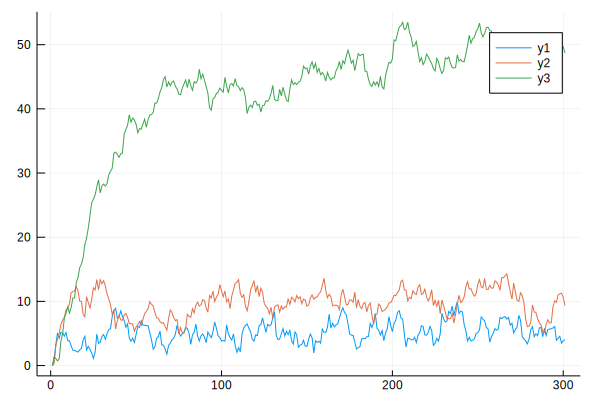

In [13]:
γ = 1
θ = [0.8, 0.9, 0.98]
y_0 = 0
σ = 1
T = 300
y_1, mean_1 = stochastic(γ, θ[1], y_0, σ, T)
y_2, mean_2 = stochastic(γ, θ[2], y_0, σ, T)
y_3, mean_3 = stochastic(γ, θ[3], y_0, σ, T)
plot(y_1)
plot!(y_2)
plot!(y_3)

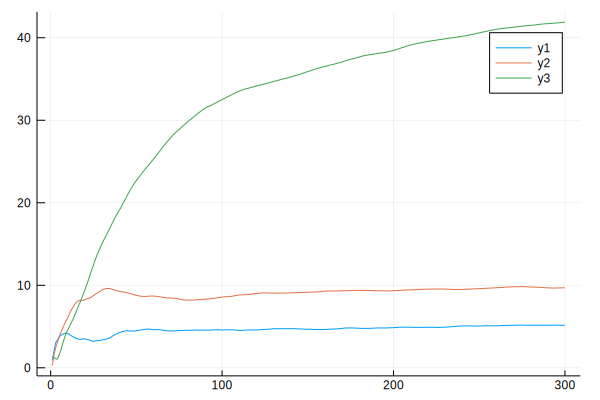

In [14]:
plot(mean_1)
plot!(mean_2)
plot!(mean_3)

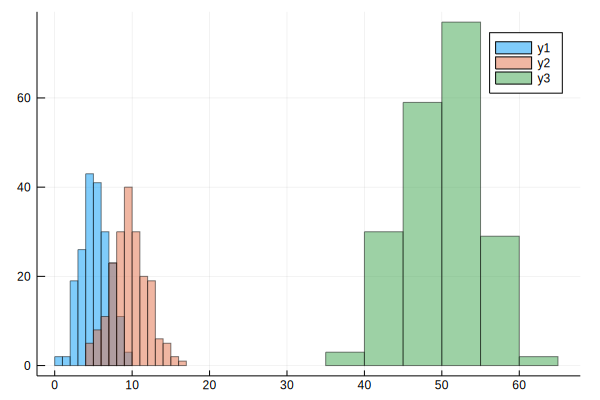

In [20]:
Y_1 = [stochastic(γ, θ[1], y_0, σ, T)[1][end] for i in 1:200]
Y_2 = [stochastic(γ, θ[2], y_0, σ, T)[1][end] for i in 1:200]
Y_3 = [stochastic(γ, θ[3], y_0, σ, T)[1][end] for i in 1:200]

histogram(Y_1, alpha = 0.5)
histogram!(Y_2, alpha = 0.5)
histogram!(Y_3, alpha = 0.5)

In [30]:
println("For θ = 0.8:")
mean = sum(Y_1)/200
@show mean
variance = sum(Y_1.^2) / 200 - mean^2
@show variance

println()
println("For θ = 0.9:")
mean = sum(Y_2)/200
@show mean
variance = sum(Y_2.^2) / 200 - mean^2
@show variance

println()
println("For θ = 0.98:")
mean = sum(Y_3)/200
@show mean
variance = sum(Y_3.^2) / 200 - mean^2
@show variance;

For θ = 0.8:
mean = 5.271485529851734
variance = 3.2075822227125315

For θ = 0.9:
mean = 9.619829348449427
variance = 5.452834232443621

For θ = 0.98:
mean = 50.16669348204837
variance = 23.57007198988549


# Exercise 3

In [61]:
x = randn(50, 2)

50×2 Array{Float64,2}:
 -0.457119   -0.0221127
 -1.36895    -0.182457 
 -0.564862   -0.49964  
 -1.81492    -0.212482 
 -0.956027   -0.583069 
 -1.62376    -0.242378 
 -1.50357    -0.998752 
  0.475898   -1.80422  
  0.33811     1.26828  
  0.734861    0.901805 
  0.178777   -0.623767 
 -0.492563    0.404508 
 -0.177619    1.36585  
  ⋮                    
  0.0878525   1.39417  
 -0.676582   -0.124    
  0.953804    0.578238 
  0.723688    0.215241 
 -1.05327     0.918655 
  0.579699   -0.692672 
 -0.351802    0.783905 
 -0.0175485   0.125696 
 -0.0471411   0.526861 
  0.408858   -1.32225  
  0.183114   -0.197743 
 -1.20593     1.4737   

In [62]:
a = 0.1
b = 0.2
c = 0.5
d = 1.0
σ = 0.1
Y = []
W = []
for i in 1:20
    w = randn(50)
    push!(W, w)
    y = [a * x[j] + b * x[j]^2 + c * x[j + 50] + d + σ * w[j] for j in 1:50]
    push!(Y, y)
end

In [117]:
A = zeros(20)
B = zeros(20)
C = zeros(20)
D = zeros(20)
Σ = zeros(20)
for (i, y) in enumerate(Y)
    w = W[i]
    X = zeros(50, 5)
    X[:, 1] = x[:, 1]
    X[:, 2] = x[:, 1].^2
    X[:, 3] = x[:, 2]
    X[:, 4] = ones(50)
    X[:, 5] = w
    a, b, c, d, σ = (X' * X) ^(-1) * X' * y
    A[i] = a
    B[i] = b
    C[i] = c
    D[i] = d
    Σ[i] = σ
end

In [126]:
@show Σ

Σ = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


20-element Array{Float64,1}:
 0.10000000000000002
 0.09999999999999999
 0.10000000000000014
 0.09999999999999995
 0.10000000000000005
 0.09999999999999999
 0.10000000000000002
 0.1                
 0.1                
 0.09999999999999999
 0.10000000000000003
 0.09999999999999992
 0.1                
 0.10000000000000005
 0.09999999999999996
 0.10000000000000002
 0.10000000000000009
 0.09999999999999981
 0.10000000000000003
 0.09999999999999999